<h3>Objectives</h3>
<ul>
<li>Explore Initial Dataset</li>
<li>Explore Preprocessed | Featured Dataset</li>
<li>Develop Hypothesis</li>
</ul>

<h3>Import Necessary Modules</h3>
<ul>
<li> Numpy: array based class that allows for transformations from the domain of linear algebra</li>
<li> Pandas: data manipulation especially with file types like json, csv, etc</li>
<li> MatplotLib: rendering plots</li>
<li> MatplotLib Finance: rendering candle stick plots </li>
<li> Seaborn: high level wrapper for matplotlib</li>
</ul>


In [1]:
# standard library
import os, sys
sys.path.append(os.path.abspath(os.path.join("../..", "src")))

# pip modules
import numpy as np
import pandas as pd
import seaborn as sns
import mplfinance as mpf
import matplotlib as mpl
import matplotlib.pyplot as plt

# local modules
import d02_processing as preprocessor

# matplotlib visualize in jupyter
%matplotlib inline

<h3>Input Data</h3>

<li>The input data is an exported csv file from a broker that records the transactions of stock exchange on the US markets.</li>

<li>In this summary report, I will be using my personal data from the year of 2021 to current date as of writing this, July 29, 2021.</li>

In [2]:
orig_csv = pd.read_csv(os.path.abspath(os.path.join("../..", "data")) + "/01_raw/01_trade_activity.csv")
orig_csv.head()

,Unnamed: 0,Exec Time,Spread,Side,Qty,Pos Effect,Symbol,Exp,Strike,Type,Price,Net Price,Order Type
0,NaN,7/29/21 06:49:27,STOCK,SELL,-5,TO CLOSE,LC,NaN,NaN,STOCK,23.24,23.24,MKT
1,NaN,7/29/21 06:49:24,STOCK,SELL,-8,TO CLOSE,LC,NaN,NaN,STOCK,23.22,23.22,STP
2,NaN,7/29/21 06:49:24,STOCK,SELL,-7,TO CLOSE,LC,NaN,NaN,STOCK,23.22,23.22,STP
3,NaN,7/29/21 06:48:38,STOCK,BUY,4,TO OPEN,LC,NaN,NaN,STOCK,23.92,23.92,LMT
4,NaN,7/29/21 06:48:38,STOCK,BUY,11,TO OPEN,LC,NaN,NaN,STOCK,23.92,23.92,LMT


<h3>Preprocessing Data</h3>

<ul>
<li>Removing missing values, empty NaN columns, and unused data columns</li>
<li>Adding feature (Net Position)</li>
</ul>


In [3]:
intermediate_filter = pd.read_csv(os.path.abspath(os.path.join("../..", "data")) + "/02_intermediate/01_df_trade_activity.csv")
intermediate_filter.head()

,Exec Time,Qty,Symbol,Type,Net Price,Net Position
0,2021-07-29 06:49:27,-5,LC,STOCK,23.24,-116.20
1,2021-07-29 06:49:24,-8,LC,STOCK,23.22,-185.76
2,2021-07-29 06:49:24,-7,LC,STOCK,23.22,-162.54
3,2021-07-29 06:48:38,4,LC,STOCK,23.92,95.68
4,2021-07-29 06:48:38,11,LC,STOCK,23.92,263.12


<h3>Processed Data</h3>

<ul>
<li>Company name (ticker)</li>
<li>Cost of trade</li>
<li>Quantity (number of shares) in the trade</li>
<li>Duration of the trade</li>
<li>Total gain or loss</li>
<li>Total number of positions (entrys & exits) (+1 +2 +3...shares etc) </li>
<li>Trade number is the index</li>
</ul>


In [4]:
processed = pd.read_csv(os.path.abspath(os.path.join("../..", "data")) + "/03_processed/01_df_trade_processed.csv")
processed.head()

,trade_num,ticker,profit_loss,cap,time_duration,positions,day,week,date,volume,entry,exit,Market Cap,Short Float,Shs Float,Market Category
0,0,LC,-10.95,475.45,122,6,3,30,2021-07-29,5,06:48:38,06:49:24,1.61B,4.86%,94.89M,small
1,1,NAOV,-0.05,25.35,441,2,3,30,2021-07-29,10,06:39:34,06:45:47,13.24M,0.97%,21.18M,nano
2,2,NAOV,-1.00,26.80,121,2,3,30,2021-07-29,10,06:33:24,06:34:37,13.24M,0.97%,21.18M,nano
3,3,NURO,-2.50,106.00,157,2,2,30,2021-07-28,5,08:00:53,08:01:44,94.16M,1.74%,1.95M,micro
4,4,TYHT,-0.60,29.70,123,2,2,30,2021-07-28,5,07:51:23,07:52:40,16.89M,6.46%,2.62M,nano


<h3>Processed Data w/Descriptive Statistics</h3>
<ul>
<li>Average (Median)</li>
<li>Frequency (Mode)</li>
<li>(Range)</li>
<li>Distribution (Box Plots)</li>
</ul>


In [5]:
processed[["profit_loss", "cap","time_duration","positions"]].describe()

,profit_loss,cap,time_duration,positions
count,1154.000000,1154.000000,1154.000000,1154.000000
mean,-0.262452,115.357444,105.634315,2.999133
std,7.680944,142.137856,84.181636,1.720495
min,-94.060000,1.010000,0.000000,2.000000
25%,-1.100000,27.900000,56.000000,2.000000
50%,-0.010000,71.495000,97.000000,2.000000
75%,1.127500,142.050000,130.000000,4.000000
max,43.000000,1144.500000,763.000000,16.000000


<h3>Visualizing Data<h3>

<ul>
<li>Scatter Plot: relationship between two variables</li>
<li>Heatmaps: shows the magnitude of the values based on a color scale</li>
</ul>

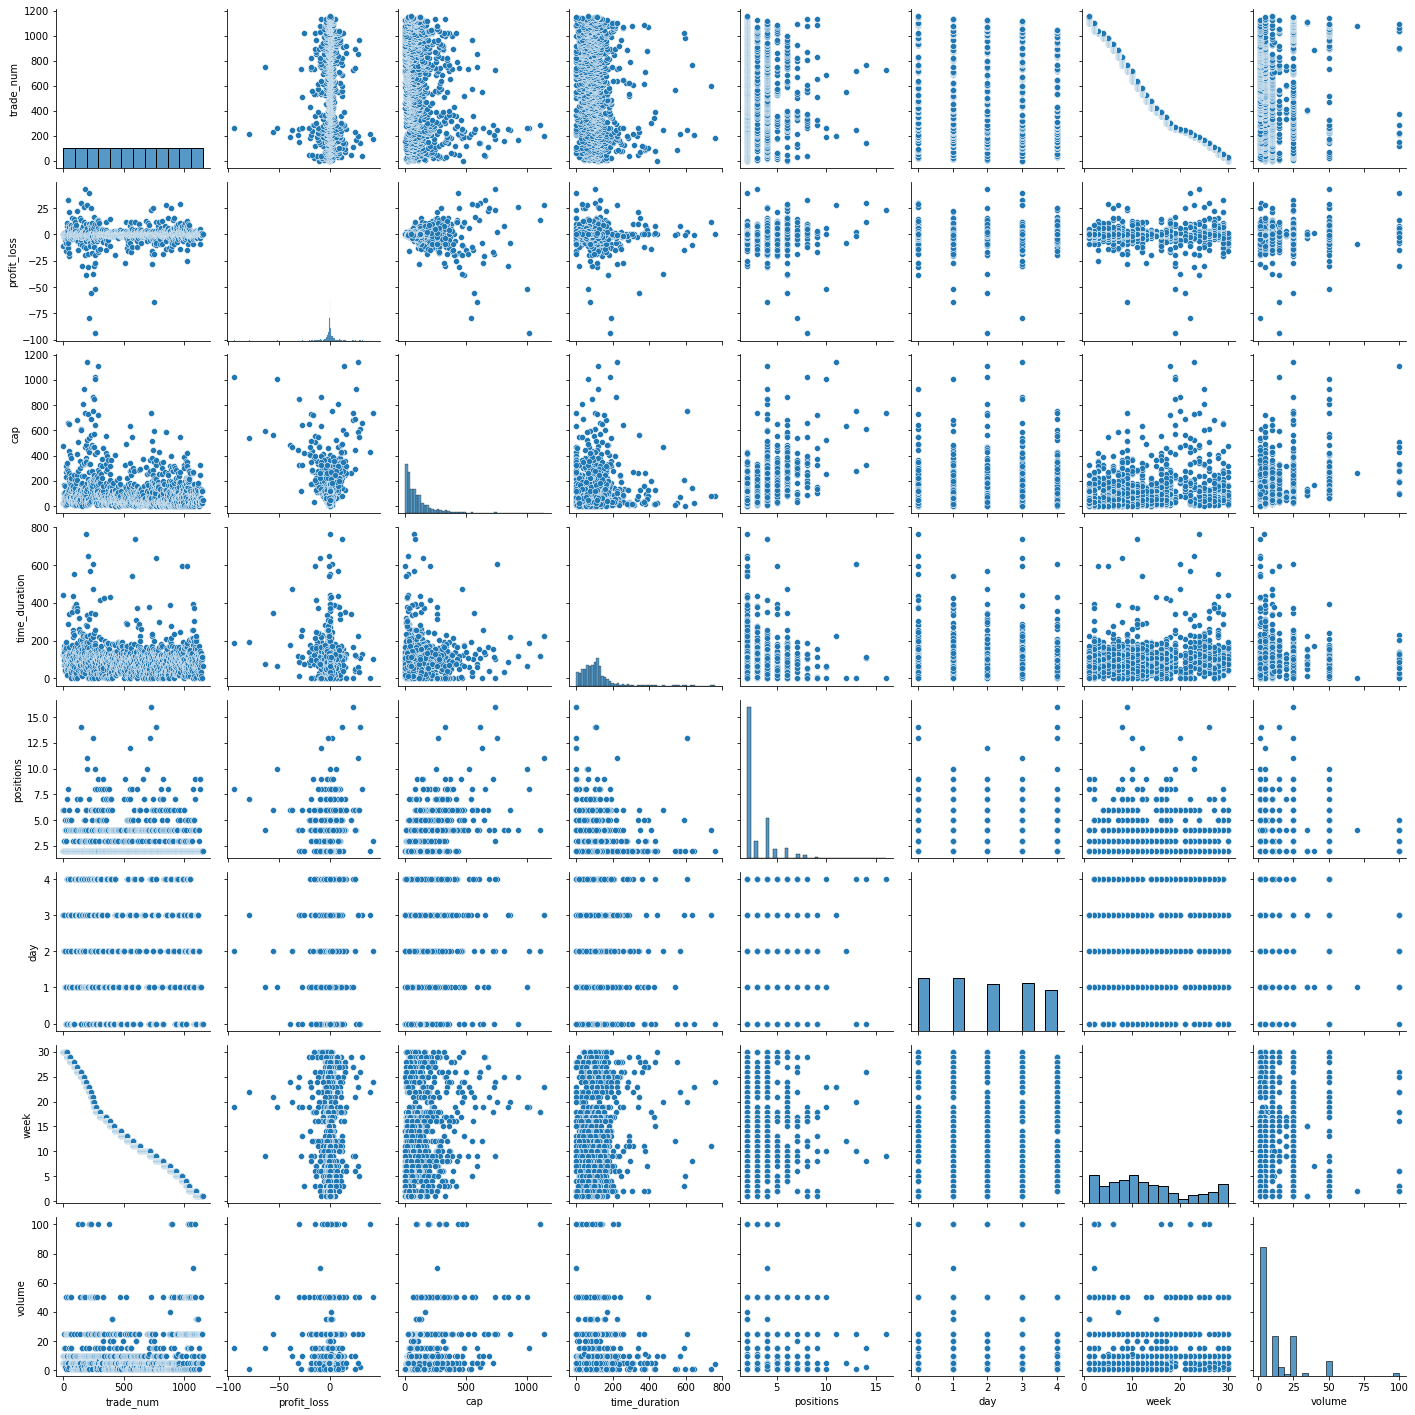

In [6]:
sns.pairplot(processed)

<h3>Inferences</h3>
<p> With just visualizing the information above, these are some inferences I can make:</p>

<ul>
<li>Widest range in profit or loss is observed on mo, tues & wend (Row 6 X Column 2)</li>
<li>Capital range(0 to $1,200) correlate with the highest deviation in the beginning of profit loss (Row 1&2 X Column 1) </li>
<li>The outliers in profit loss are within in the 0-25 volume range </li>
</ul>

<h3> Hypothesis</h3>

<ul>
<li>There may not be a clear linear relationship with any two variables, however, it does seem worth exploring with these three particular variables: capital, profit loss, and volume because of the highlighted regions of interest from above.</li>
<li>Treating the cummulative history from all the trades as a stock to predict where the account balance maybe heading might be useful to explore with a long short-term memory neural network (nonlinear modeling) </li>
</ul>

<h3>Cummulative History of Profit Loss</h3>

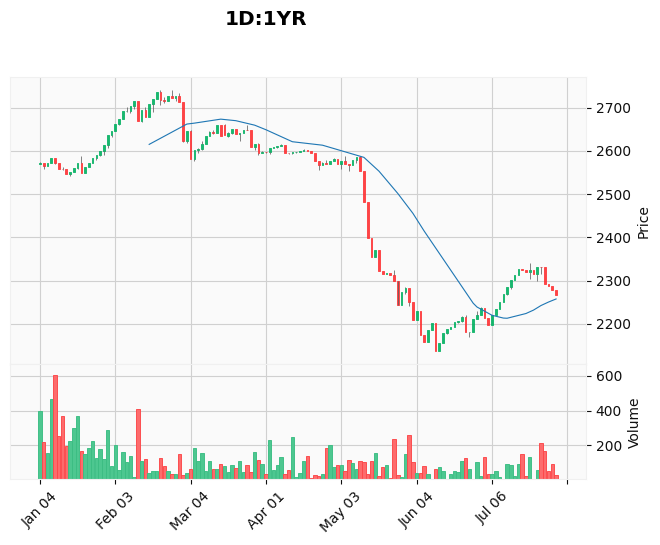

In [7]:
data = pd.read_csv(os.path.abspath(os.path.join("../..", "data")) + "/03_processed/01_df_trade_candles.csv")
data.index = pd.DatetimeIndex(data['date'])
mpf.plot(data,type='candle',style='yahoo',volume=True,title='1D:1YR',mav=(30))

<h3> Heatmaps Grouped by Weeks and day of the week </h3>

<ul>
<li> Total Day Gain or Loss</li>
<li> Buying Power</li>
<li> Number of Trades Taken</li>
<li> Time Duration </li>
</ul>

<AxesSubplot:title={'center':'Average Time Duration of Trade (Seconds)'}, xlabel='None-day', ylabel='week'>

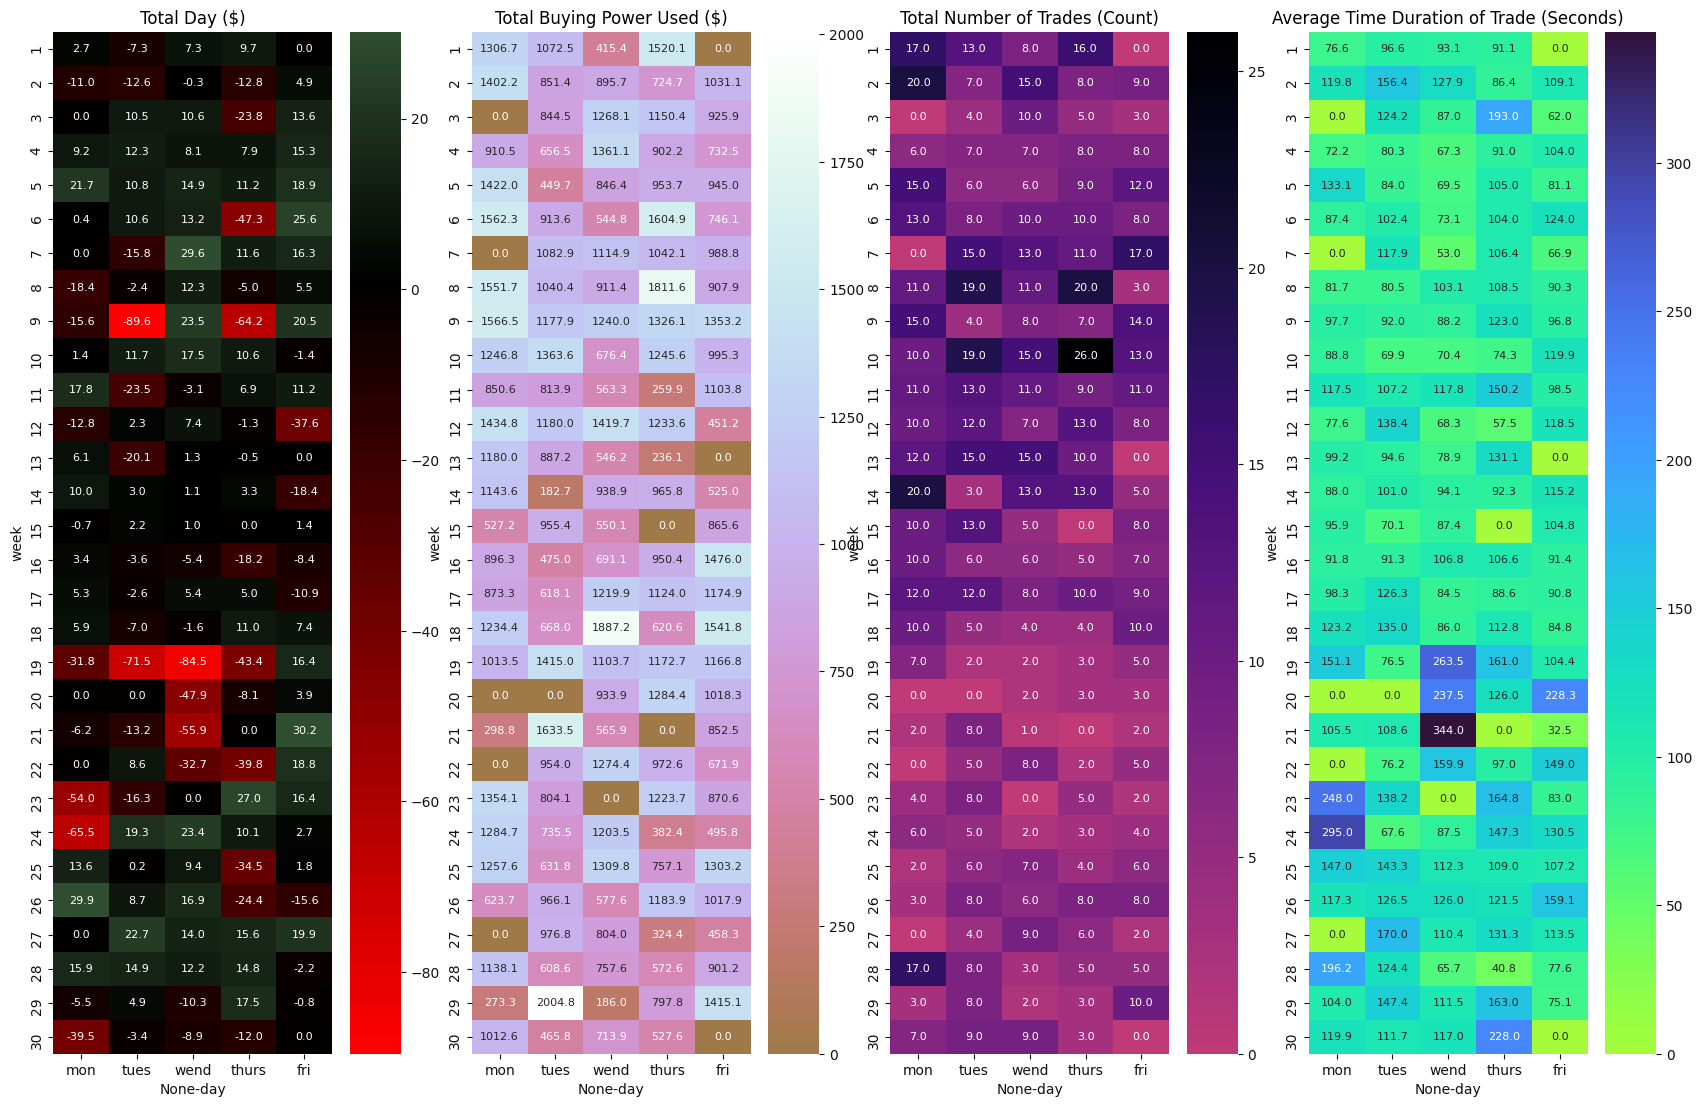

In [8]:
# grid dimension
a4_dims = (20.7,13.27)

# seaborn grid palette
cmap = mpl.colors.LinearSegmentedColormap.from_list(name="profit_loss gradient", colors=["red", "black", "lightgreen"])

# heatmap: calendar variables: profit_loss, buying power, time duration, number of trades
fig, axs = plt.subplots(ncols=4,figsize=a4_dims)

#heatmap: profit loss per day of the week
axs[0].set_title('Total Day ($)')
tmp = processed.groupby(["week", "day"])[["profit_loss"]].sum().unstack().fillna(0)
sns.heatmap(tmp,ax=axs[0],annot=True,cmap=cmap,center=True,xticklabels=["mon", "tues", "wend", "thurs", "fri"],annot_kws={"fontsize": 8},fmt=".1f")

#heatmap: buying power used per day of the week
axs[1].set_title("Total Buying Power Used ($)")
tmp = processed.groupby(["week", "day"])[["cap"]].sum().unstack().fillna(0)
sns.heatmap(tmp,ax=axs[1],annot=True,cmap="cubehelix",center=True,xticklabels=["mon", "tues", "wend", "thurs", "fri"],annot_kws={"fontsize": 8},fmt=".1f")

#heatmap: number of trades taken per day of the week
axs[2].set_title("Total Number of Trades (Count)")
tmp = (processed.groupby(["week", "day"])[["profit_loss"]].count().unstack().fillna(0))
sns.heatmap(tmp,ax=axs[2],annot=True,cmap="magma_r",center=True,xticklabels=["mon", "tues", "wend", "thurs", "fri"],annot_kws={"fontsize": 8},fmt=".1f",)

#heatmap: time duration of trade per day of the week
axs[3].set_title("Average Time Duration of Trade (Seconds)")
tmp = (processed.groupby(["week", "day"])[["time_duration"]].mean().unstack().fillna(0))
sns.heatmap(tmp,ax=axs[3],annot=True,cmap="turbo_r",center=True,xticklabels=["mon", "tues", "wend", "thurs", "fri"],annot_kws={"fontsize": 8},fmt=".1f",)

<h3>Heatmaps of trades grouped by green(+) | red trades (-) </h3>

<AxesSubplot:title={'center':'Total Day ($)'}, xlabel='None-day', ylabel='week'>

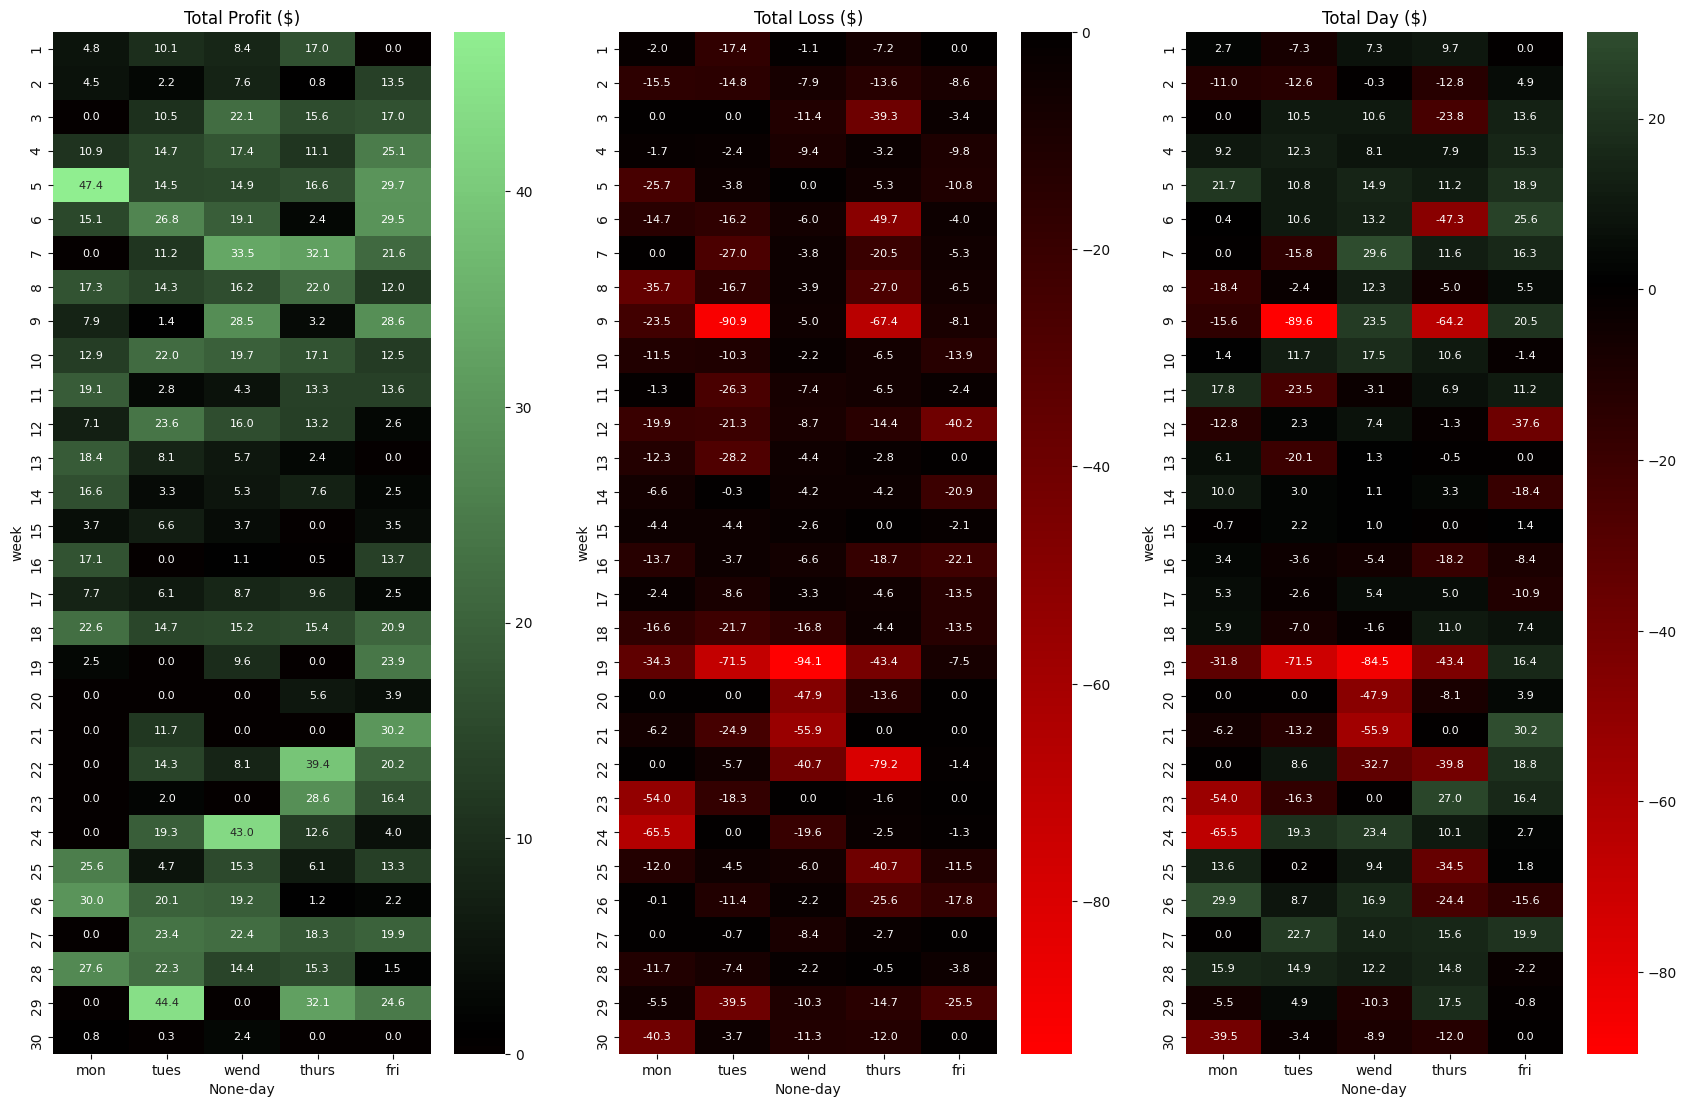

In [9]:
# heatmap calendar: max vals
figg, axss = plt.subplots(ncols=3,figsize=a4_dims)

# heatmap: profit loss per day of the week
axss[0].set_title('Total Profit ($)')
axss[1].set_title('Total Loss ($)')
axss[2].set_title('Total Day ($)')

#set
tmps_1=processed.groupby(["week", "day"])[["profit_loss"]].sum().unstack().fillna(0)
tmps_2=processed.groupby(['week','day'])['profit_loss'].agg([ ('positive' , lambda x : x[x > 0].sum())]).unstack().fillna(0)
tmps_3=processed.groupby(['week','day'])['profit_loss'].agg([ ('negative' , lambda x : x[x < 0].sum())]).unstack().fillna(0)

#gen
sns.heatmap(tmps_2,ax=axss[0],annot=True,cmap=cmap,center=True,xticklabels=["mon", "tues", "wend", "thurs", "fri"],annot_kws={"fontsize": 8},fmt=".1f")
sns.heatmap(tmps_3,ax=axss[1],annot=True,cmap=cmap,center=True,xticklabels=["mon", "tues", "wend", "thurs", "fri"],annot_kws={"fontsize": 8},fmt=".1f")
sns.heatmap(tmps_1,ax=axss[2],annot=True,cmap=cmap,center=True,xticklabels=["mon", "tues", "wend", "thurs", "fri"],annot_kws={"fontsize": 8},fmt=".1f")

<h3>Heatmaps Grouped By Weeks</h3>
<ul>
<li> Total Week Gain or Loss</li>
<li> Trade Position Counts</li>
<li> Buying Power </li>
</ul>

<AxesSubplot:title={'center':'Total Buying Power Used ($)'}>

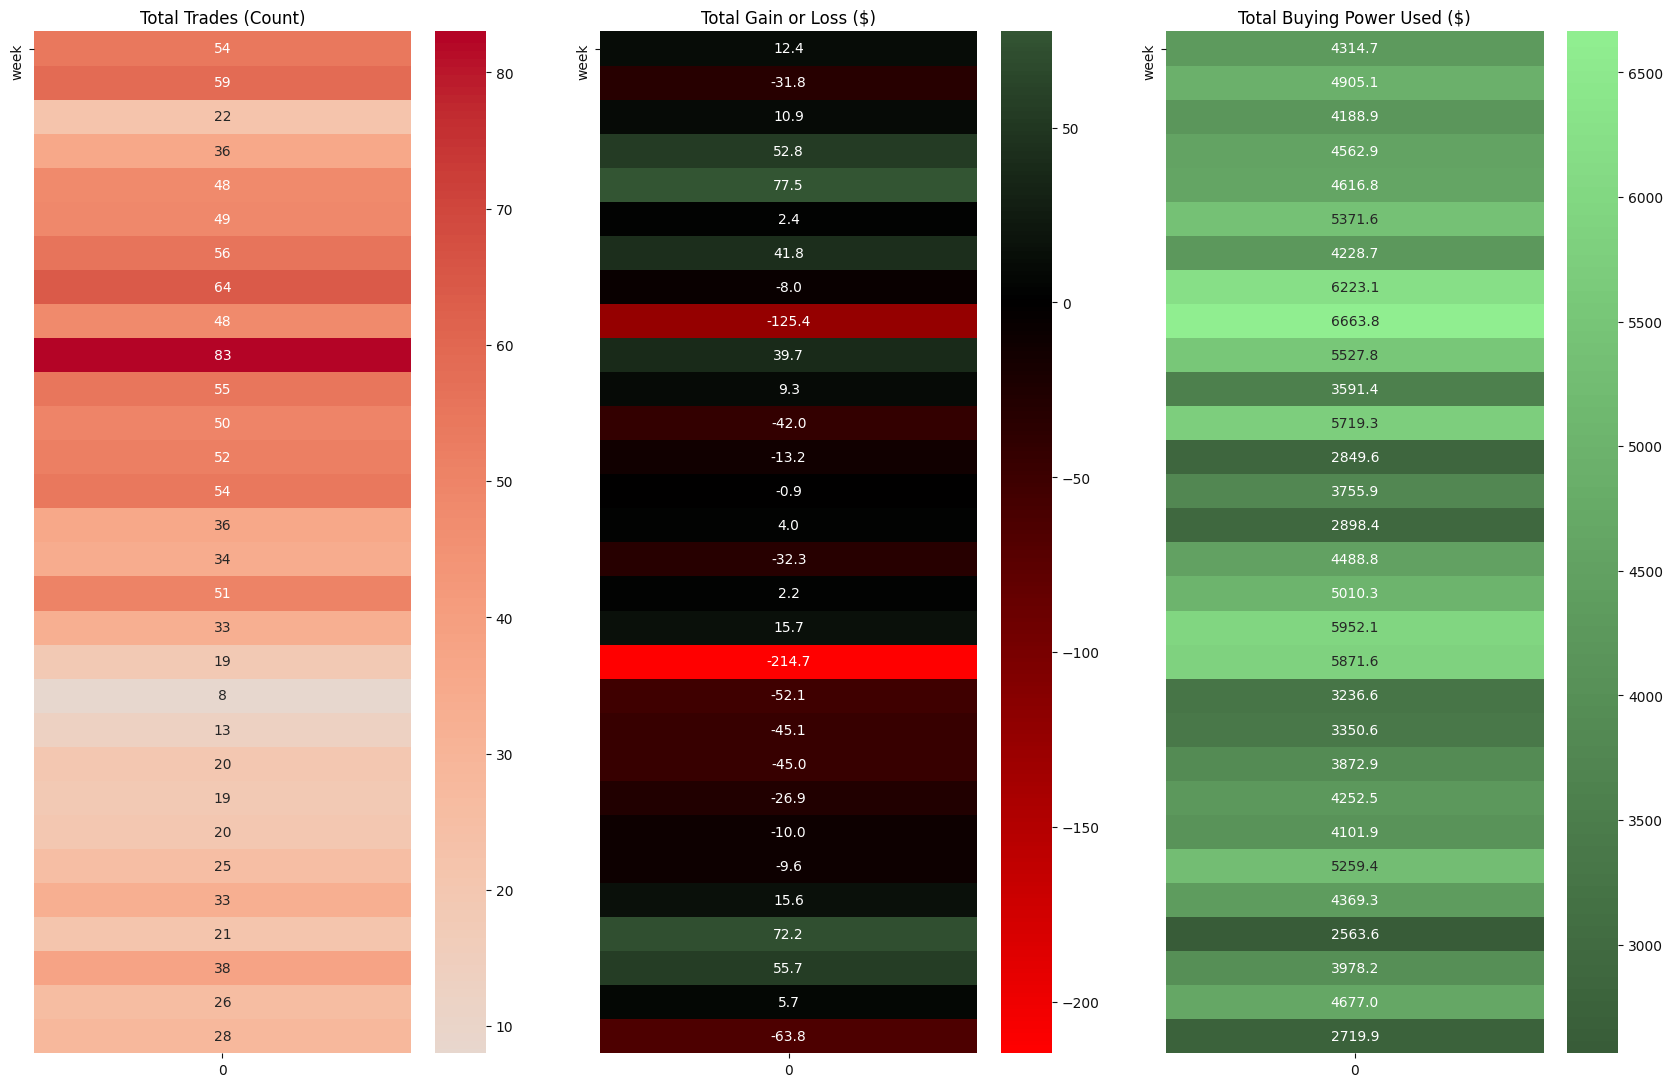

In [10]:
# heatmap grid plots
figgg, axsss = plt.subplots(ncols=3, figsize=a4_dims)
axsss[0].set_title('Total Trades (Count)')
axsss[1].set_title('Total Gain or Loss ($)')
axsss[2].set_title('Total Buying Power Used ($)')

#heatmap : trades per week
trades_per_week = processed.groupby("week")[["profit_loss"]].count()
trades_per_week = np.asarray(trades_per_week).reshape(30, 1)#todo fix
sns.heatmap(trades_per_week, annot=True, cmap="coolwarm", center=True, ax=axsss[0],yticklabels=['week'])

#heatmap: profit loss per week
profit_loss_per_week = processed.groupby("week")[["profit_loss"]].sum()
profit_loss_per_week = np.asarray(profit_loss_per_week).reshape(30, 1) #todo fix
sns.heatmap(profit_loss_per_week, annot=True, cmap=cmap, center=True, fmt="0.1f",ax=axsss[1],yticklabels=['week'])

#heatmap: buying power used per week
bp_total_week = processed.groupby("week")[["cap"]].sum()
bp_total_week = np.asarray(bp_total_week).reshape(30, 1) #todo fix
sns.heatmap(bp_total_week, annot=True, cmap=cmap, center=True, fmt="0.1f",ax=axsss[2],yticklabels=['week'])

<h3>3D Plot for fun....

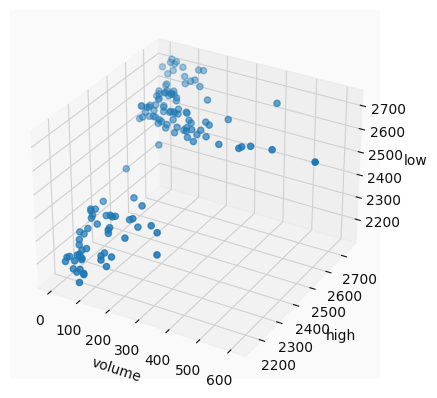

In [11]:
#3d plot test
figer = plt.figure()
axdata = figer.add_subplot(111,projection='3d')
x,y,z = data.volume,data.high,data.low
axdata.set_xlabel('volume')
axdata.set_ylabel('high')
axdata.set_zlabel('low')
axdata.scatter(x,y,z)
plt.show()